## Imports

In [1]:
import numpy as np #math stuff
import matplotlib.pyplot as plt #visualizing stuff

## Generating Data-set

In [50]:
x = np.random.randn(100)
y = (x * 1.25) + 1.5 + np.random.randn(100) # coeffitients theta_0 = 1.5 and theta_1 = 1.25, added random noise to each data point

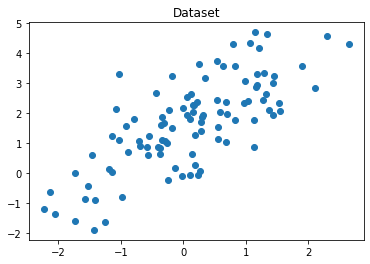

In [84]:
plt.scatter(x, y)
plt.title('Dataset');

In [65]:
coef = np.corrcoef(x,y)[0][1]
print('The linear correlation coefficient is %.2f'%coef)

The linear correlation coefficient is 0.75


In [75]:
x_line = np.linspace(-3,3)
line = x_line*1.25+1.5

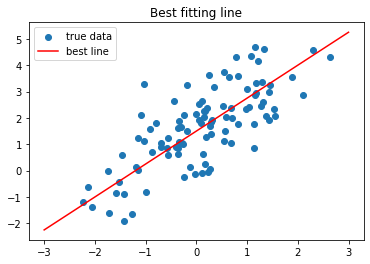

In [81]:
plt.scatter(x, y)
plt.plot(x_line, line, c = 'r')
plt.legend(['true data', 'best line'])
plt.title('Best fitting line');

## Math background

**To calculate the distance between all the points and the line we can use the well know sum of squared residuals**


_This is the euclidean distance between all points and the points in the line, we square it to account for negative distances as well as penalizing large errors_

$$ SSR = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Where:
- $n$ is the number of observations,
- $y_i$ is the observed value for the ith observation,
- $\hat{y}_i$ is the predicted value for the ith observation.

**<p style="text-align: center;">Knowing that</p>**

$$ \hat{y_i} = x_i*\theta_1 + \theta_0 $$

_<p style="text-align: center;">Then</p>_

$$SSR = \sum_{i=1}^{n} (y_i - (x_i*\theta_1 + \theta_0))^2 $$

Where
- $\theta_0 $ is the intercept
- $\theta_1 $ is the angular coefficient
- x is the imput data

**Mainly we want to find the vector $\theta$ such that**

$$\theta = \argmin(SSR = \sum_{i=1}^{n} (y_i - (x_i*\theta_1 + \theta_0))^2) $$

### There is a cool way to approximate this function to the lowest point.
We can use a neat function in calculus called gradient $(\nabla{f})$, the gradient is a vector that points in the direction of the steepest ascent of $f$, the magnitude of the gradient shows the rate of increase of the function at that point.

**Given:**

$
\nabla f(\left.(y_i - (x_i*\theta_1 + \theta_0))^2\right)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial \theta_1}\\\\
\dfrac{\partial f}{\partial \theta_0}\\
\end{array}\right]\\
$
**Then:**

$
\nabla f((\left.y_i - (x_i*\theta_1 + \theta_0))^2\right)=\left[\begin{array}{c}
(\left.2*(y_i - (x_i*\theta_1 + \theta_0))*x_i\right)\\\\
(\left.2*(y_i - (x_i*\theta_1 + \theta_0))\right) \\
\end{array}\right]
$

Now that we know what the gradient vector is we can set a function to approximate the lowest point of the loss function. To be able to do that we can set the next value of the vector $\theta$ to be the value of the last iteration minus the value of the vector $\nabla{f}$.

$\theta = \theta - \nabla{f}$

This is almost perfect, now we only have to take care of a simple last concept, the *learning rate*, most times updating the values of $\theta$ by using the whole values for the gradients make us overshoot the minimum point, to fix this we scale the value of the gradient $(\nabla{f})$ by a hyper-parameter $\alpha$ usually between $10^{-1}$ and $10^{-5}$, this way we can control the step-size of our optimization algorithm, making sure we don't overshoot.

$\theta = \theta - \alpha*\nabla{f}$

## Code

### Now that we have everything we can start writing code